# Problem Statement - Credit Card Defualt Status
# Predictive Modeling - Linear Discriminant Analysis

In [2]:
#Import all necessary modules
import pandas as pd  ###Software library written for the Python programming language for data manipulation and analysis.
import numpy as np ### fundamental package for scientific computing with Python
import os ### using operating system dependent functionality
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

# Set the working directory

In [3]:
#os.chdir('C:\\GL Class\Solution Preparation\Logistic Regression - Python')

# Import Excel file

Load the Data file into Python DataFrame using pandas read_csv method

Ensure that data set loaded do not have any unicode character 

In [4]:
data_df = pd.read_csv("default.csv")


# View Top 10 rows

head function is used to view the top records. The number records to be view need to be  given in the parenthesis.

In [5]:
data_df.head(10)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2
5,Female,1,Management,12,86,3.6,No,critical,1,personal,4
6,Female,1,Management,15,86,3.6,No,critical,1,personal,4
7,Male,1,skilled,12,85,3.6,No,poor,1,personal,2
8,Male,1,skilled,13,87,3.9,No,critical,1,personal,2
9,Male,1,skilled,13,89,4.0,No,critical,1,personal,0


# Some more basic commands

tail function is used to view the last records. The number records to be view need to be given in the parenthesis.

In [6]:
data_df.tail(20)

,Gender,Loan.Offered,Job,Work.Exp,Credit.Score,EMI.Ratio,Status,Credit.History,Own house,Purpose,Dependents
761,Male,1,Management,0,43,14.0,Default,good,0,car,1
762,Male,1,Management,2,47,14.0,Default,verygood,0,car,1
763,Female,1,skilled,5,58,14.0,Default,critical,0,personal,0
764,Female,1,skilled,6,58,14.0,Default,critical,0,personal,0
765,Male,1,skilled,1,42,14.0,Default,critical,0,consumer.durable,0
766,Male,1,skilled,4,47,14.0,Default,critical,0,consumer.durable,0
767,Male,1,skilled,3,47,14.2,Default,critical,0,consumer.durable,0
768,Male,1,skilled,1,42,14.2,Default,critical,0,consumer.durable,0
769,Male,1,skilled,4,52,14.3,Default,good,0,car,0
770,Male,1,skilled,3,42,14.3,Default,good,0,car,0


In [7]:
data_df.describe()

,Loan.Offered,Work.Exp,Credit.Score,EMI.Ratio,Own house,Dependents
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,0.756722,12.377721,83.597951,9.495006,0.768246,2.081946
std,0.429336,3.809161,12.040410,2.786867,0.422223,1.068641
min,0.000000,0.000000,42.000000,3.000000,0.000000,0.000000
25%,1.000000,11.000000,83.000000,7.400000,1.000000,2.000000
50%,1.000000,13.000000,87.000000,9.500000,1.000000,2.000000
75%,1.000000,15.000000,91.000000,11.400000,1.000000,3.000000
max,1.000000,19.000000,99.000000,15.000000,1.000000,4.000000


In [8]:
data_df.dtypes

Gender             object
Loan.Offered        int64
Job                object
Work.Exp            int64
Credit.Score        int64
EMI.Ratio         float64
Status             object
Credit.History     object
Own house           int64
Purpose            object
Dependents          int64
dtype: object

In [9]:
type(data_df)

pandas.core.frame.DataFrame

# Check for missing values

In [10]:
data_df.isnull().sum()

Gender            0
Loan.Offered      0
Job               0
Work.Exp          0
Credit.Score      0
EMI.Ratio         0
Status            0
Credit.History    0
Own house         0
Purpose           0
Dependents        0
dtype: int64

No Missing values

In [11]:
data_df.shape ### 781 rows and 11 features

(781, 11)

# Convert Own House into object

In [12]:
data_df['Own house']=data_df['Own house'].astype('object')

# Find out unique values in each categorical column



In [13]:
data_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
data_df['Job'].unique()

array(['unskilled', 'skilled', 'Management'], dtype=object)

In [15]:
data_df['Status'].unique() ### No means No Default

array(['No', 'Default'], dtype=object)

In [16]:
data_df['Credit.History'].unique()

array(['poor', 'critical', 'good', 'very good', 'verygood', 'Poor'],
      dtype=object)

In [17]:
data_df['Own house'].unique()

array([1, 0], dtype=object)

In [18]:
data_df['Purpose'].unique()

array(['personal', 'car', 'education', 'consumer.durable'], dtype=object)

In [19]:
data_df.dtypes

Gender             object
Loan.Offered        int64
Job                object
Work.Exp            int64
Credit.Score        int64
EMI.Ratio         float64
Status             object
Credit.History     object
Own house          object
Purpose            object
Dependents          int64
dtype: object

# Clean the dataset -- Correction in the values

In [20]:
data_df['Credit.History']=np.where(data_df['Credit.History'] =='very good', 'verygood', data_df['Credit.History'])

In [21]:
data_df['Credit.History']=np.where(data_df['Credit.History'] =='Poor', 'poor', data_df['Credit.History'])

In [22]:
data_df['Credit.History'].unique()

array(['poor', 'critical', 'good', 'verygood'], dtype=object)

# Count of Default and No Default in the Target Column

In [23]:
data_df['Status'].value_counts()

No         656
Default    125
Name: Status, dtype: int64

# Univariate Plots


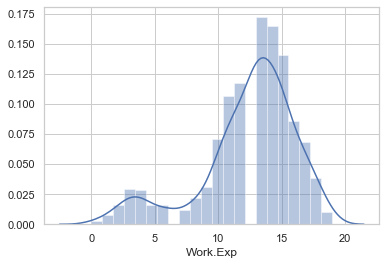

In [24]:
sns.distplot(data_df['Work.Exp'])
plt.show() ### Not required in this version, inserted just to show that if graph is not printing then this is required

# Bivariate Analysis 


Bivariate shown below is only as a sample.. Reader is adviced to perform complete data exploration process

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


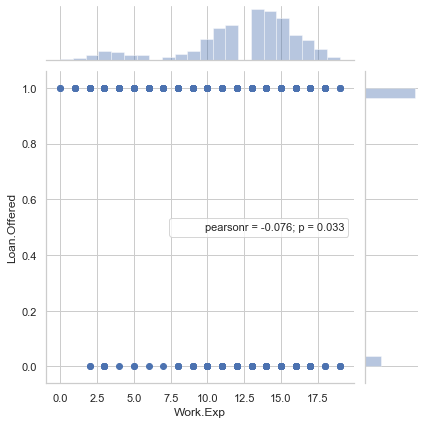

In [25]:
sns.jointplot(data_df['Work.Exp'], data_df['Loan.Offered']).annotate(stats.pearsonr) ### annotate function of stats is to print correlation value

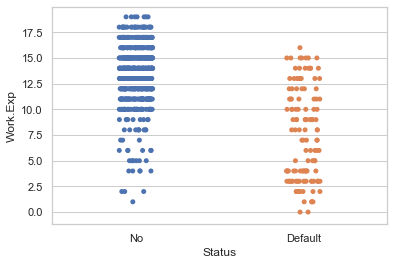

In [26]:
sns.stripplot(data_df['Status'], data_df['Work.Exp']) ### Concentration of observations

Lower Work Experience have more concentration of Default.. Reader is adviced to perform more analysis and generate insight.

# Find the Distribution of Dependent Variable Categories


In [31]:
count_no_sub = len(data_df[data_df['Status']=='No'])
count_sub = len(data_df[data_df['Status']=='Default'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no Default is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Default", pct_of_sub*100)

percentage of no Default is 83.99487836107554
percentage of Default 16.005121638924454


Distribution is not biased and hence no need to use SMOTE or any other package to balance binary classes

Text(0, 0.5, 'Status')

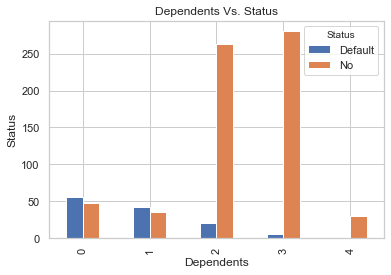

In [32]:
pd.crosstab(data_df.Dependents,data_df.Status).plot(kind='bar')
plt.title('Dependents Vs. Status')
plt.xlabel('Dependents')
plt.ylabel('Status')


Below commands are only done as a good practice.. Not mandatory

In [33]:
data_df.rename(columns = {'Own house':'Ownhouse'}, inplace = True) 
data_df.rename(columns = {'Loan.Offered':'LoanOffered'}, inplace = True) 
data_df.rename(columns = {'Work.Exp':'WorkExp'}, inplace = True) 
data_df.rename(columns = {'Credit.Score':'CreditScore'}, inplace = True) 
data_df.rename(columns = {'EMI.Ratio':'EMIRatio'}, inplace = True) 
data_df.rename(columns = {'Credit.History':'CreditHistory'}, inplace = True) 


In [34]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
Gender           781 non-null object
LoanOffered      781 non-null int64
Job              781 non-null object
WorkExp          781 non-null int64
CreditScore      781 non-null int64
EMIRatio         781 non-null float64
Status           781 non-null object
CreditHistory    781 non-null object
Ownhouse         781 non-null object
Purpose          781 non-null object
Dependents       781 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 67.2+ KB


# Convert Object Feature types for Linear Discriminant Analysis

In [35]:
data_df['Gender']=np.where(data_df['Gender'] =='Male', '1', data_df['Gender'])
data_df['Gender']=np.where(data_df['Gender'] =='Female', '0', data_df['Gender'])

In [36]:
data_df['Job']=np.where(data_df['Job'] =='Management', '1', data_df['Job'])
data_df['Job']=np.where(data_df['Job'] =='unskilled', '0', data_df['Job'])
data_df['Job']=np.where(data_df['Job'] =='skilled', '2', data_df['Job'])

In [37]:
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='critical', '1', data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='poor', '0', data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='good', '2', data_df['CreditHistory'])
data_df['CreditHistory']=np.where(data_df['CreditHistory'] =='verygood', '3', data_df['CreditHistory'])

In [38]:
data_df['Purpose']=np.where(data_df['Purpose'] =='personal', '1', data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='car', '0', data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='education', '2', data_df['Purpose'])
data_df['Purpose']=np.where(data_df['Purpose'] =='consumer.durable', '3', data_df['Purpose'])


In [39]:
data_df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,1,0,0,14,86,3.0,No,0,1,1,2
1,0,1,2,15,94,3.0,No,0,1,1,3
2,1,0,0,16,86,3.0,No,0,1,1,2
3,0,1,2,13,94,3.0,No,0,1,1,3
4,1,1,2,12,85,3.3,No,0,1,1,2


In [40]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
Gender           781 non-null object
LoanOffered      781 non-null int64
Job              781 non-null object
WorkExp          781 non-null int64
CreditScore      781 non-null int64
EMIRatio         781 non-null float64
Status           781 non-null object
CreditHistory    781 non-null object
Ownhouse         781 non-null object
Purpose          781 non-null object
Dependents       781 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 67.2+ KB


In [41]:
# Prepare training and test data and scale it
X = np.asmatrix(data_df[['Gender','LoanOffered','Job','WorkExp','CreditScore','EMIRatio','CreditHistory','Ownhouse','Purpose','Dependents']])
X = scale(X)
Y = np.asarray(data_df[['Status']])

In [42]:
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

C:\Users\v2n\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [43]:
# Predict it
pred_class = model.predict(X)
data_df['Prediction'] = pred_class 


In [44]:
# Check Correlation values
#Refer on correlation at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data= data_df[['Gender','LoanOffered','Job','WorkExp','CreditScore','EMIRatio','CreditHistory','Ownhouse','Purpose','Dependents']]
Cor1 = data.corr()
Cor1

,LoanOffered,WorkExp,CreditScore,EMIRatio,Dependents
LoanOffered,1.000000,-0.076224,-0.082435,0.057273,-0.029145
WorkExp,-0.076224,1.000000,0.915575,-0.300286,0.408753
CreditScore,-0.082435,0.915575,1.000000,-0.382192,0.490798
EMIRatio,0.057273,-0.300286,-0.382192,1.000000,-0.251782
Dependents,-0.029145,0.408753,0.490798,-0.251782,1.000000


In [45]:
#generate Confusion Matrix
# Please refer for confusion matrix http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(Y, pred_class)

array([[124,   1],
       [ 22, 634]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

     Default       0.85      0.99      0.92       125
          No       1.00      0.97      0.98       656

    accuracy                           0.97       781
   macro avg       0.92      0.98      0.95       781
weighted avg       0.97      0.97      0.97       781

